In [2]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_38/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


**Setup**

Si la instalación de lightgbm da error, ejecutar en Anaconda Prompt 

`conda install -c conda-forge xgboost=1.4.0`

`conda install -c conda-forge lightgbm=3.2.1`

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Prediciendo quiebra de empresas

En este Checkpoint vamos a trabajar en predecir la quiebra de empresas en Polonia. La información fue obtenida del Servicio de Información de Mercados Emergentes (EMIS por sus siglas en inglés), que es una base de datos que contiene información de los mercados emergentes alrededor del mundo. Las compañías en bancarrota fueron analizadas en el período 2000-2012, mientras que las que continuan operando se evaluaron desde 2007 a 2013.

En este caso sólo vamos a trabajar con el tercer año de los disponibles. Se puede consultar la página de UCI en donde se encuentra alojado <a href='https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'> aqui </a> 

El dataset empleado tiene datos de las empresas y su estatus tres años después.

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [4]:
df = pd.read_csv("../Data/3year.csv")

In [5]:
df.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [6]:
# eliminamos la primera columna que se trata de un indice.
df = df.drop("Unnamed: 0", axis = 1)

Acá hay una descripción de los atributos

- Attr1: net profit / total assets
- Attr2: total liabilities / total assets
- Attr3: working capital / total assets
- Attr4: current assets / short-term liabilities
- Attr5: [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- Attr6: retained earnings / total assets
- Attr7: EBIT / total assets
- Attr8: book value of equity / total liabilities
- Attr9: sales / total assets
- Attr10: equity / total assets
- Attr11: (gross profit + extraordinary items + financial expenses) / total assets
- Attr12: gross profit / short-term liabilities
- Attr13: (gross profit + depreciation) / sales
- Attr14: (gross profit + interest) / total assets
- Attr15: (total liabilities * 365) / (gross profit + depreciation)
- Attr16: (gross profit + depreciation) / total liabilities
- Attr17: total assets / total liabilities
- Attr18: gross profit / total assets
- Attr19: gross profit / sales
- Attr20: (inventory * 365) / sales
- Attr21: sales (n) / sales (n-1)
- Attr22: profit on operating activities / total assets
- Attr23: net profit / sales
- Attr24: gross profit (in 3 years) / total assets
- Attr25: (equity - share capital) / total assets
- Attr26: (net profit + depreciation) / total liabilities
- Attr27: profit on operating activities / financial expenses
- Attr28: working capital / fixed assets
- Attr29: logarithm of total assets
- Attr30: (total liabilities - cash) / sales
- Attr31: (gross profit + interest) / sales
- Attr32: (current liabilities * 365) / cost of products sold
- Attr33: operating expenses / short-term liabilities
- Attr34: operating expenses / total liabilities
- Attr35: profit on sales / total assets
- Attr36: total sales / total assets
- Attr37: (current assets - inventories) / long-term liabilities
- Attr38: constant capital / total assets
- Attr39: profit on sales / sales
- Attr40: (current assets - inventory - receivables) / short-term liabilities
- Attr41: total liabilities / ((profit on operating activities + depreciation) * (12/365))
- Attr42: profit on operating activities / sales
- Attr43: rotation receivables + inventory turnover in days
- Attr44: (receivables * 365) / sales
- Attr45: net profit / inventory
- Attr46: (current assets - inventory) / short-term liabilities
- Attr47: (inventory * 365) / cost of products sold
- Attr48: EBITDA (profit on operating activities - depreciation) / total assets
- Attr49: EBITDA (profit on operating activities - depreciation) / sales
- Attr50: current assets / total liabilities
- Attr51: short-term liabilities / total assets
- Attr52: (short-term liabilities * 365) / cost of products sold)
- Attr53: equity / fixed assets
- Attr54: constant capital / fixed assets
- Attr55: working capital
- Attr56: (sales - cost of products sold) / sales
- Attr57: (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- Attr58: total costs /total sales
- Attr59: long-term liabilities / equity
- Attr60: sales / inventory
- Attr61: sales / receivables
- Attr62: (short-term liabilities *365) / sales
- Attr63: sales / short-term liabilities
- Attr64: sales / fixed assets
- class: toma los valores "b'0'" y "b'1'" indicando si la empresa quebro o no.

### Ejercicio 1
1) Obtener la `matriz de features X` y la `variable target y`  
2) Analizar la forma (shape) del dataset.  
3) Ver los valores que toma la variable target  
4) Aplicar LabelEncoder sobre la variable target.

In [7]:
y = df["class"]
X = df.drop("class", axis = 1)

In [8]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  10503  filas y  64  columnas


In [9]:
y.unique()


array(["b'0'", "b'1'"], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
y = encoder.fit_transform(y)

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Ejercicio 2
1) Realizar un split en Train y Test, dejando un 20% para test  
2) crear un generador de CV utilizando: `cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)` para luego pasarselo tanto a `GridSearchCV` como a `cross_val_score`


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

### Ejercicio 3: Xgboost
1) Importar el clasificador `XGBoost` del módulo `xgboost.sklearn` que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier


In [15]:
from xgboost.sklearn import XGBClassifier
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

2) Utilizando el siguiente diccionario de parametros, optimizar los hiperparámetros.  
3) Imprimir en pantalla la mejor selección de hiperparámetros

In [16]:
from sklearn.model_selection import GridSearchCV
params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [17]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [18]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.9min finished


[14:01:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_c...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                             

In [19]:
xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

5) Evaluar el rendimiento del estimador optimo, utilizando cross validation.  
(pasarle como argumento cv el generador de CV splits del creado en el punto 3)  
**nota:** ver función evaluar_rendimiento() utilizada en la notebook `2-Boosting_Practica.ipynb`

In [20]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [21]:
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)


Rendimiento de XG Boost:	0.97 ± 0.004


6) utilizando roc_auc_score de la libreria sklearn.metrics, determinar el valor del ROC.

In [22]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [23]:
from sklearn.metrics import roc_auc_score
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.7591435295614287


In [24]:
xgb.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

7) utilizando plot_roc de la libreria sklearn.metrics, graficamos la curva ROC por clase

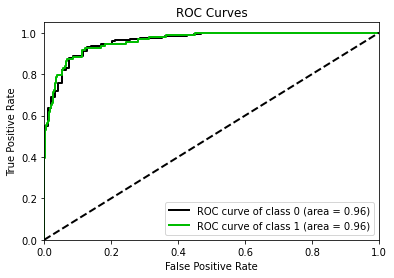

In [25]:
from scikitplot.metrics import plot_roc
%matplotlib inline
plot_roc(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);


### BONUS: 
graficar la importancia de los atributos del estimador optimizado.  

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

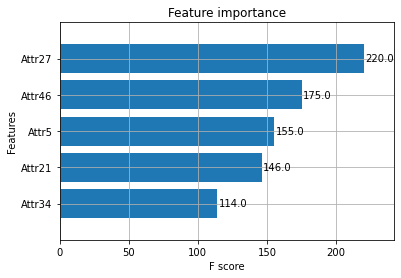

In [26]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);